# Linear Regression

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import re

In [37]:
###データ読込(結合したデータ)
train = pd.read_csv("~/repo/study/JLeague/data/train_new.csv")
test = pd.read_csv("~/repo/study/JLeague/data/test_new.csv")

## Feature Enginiering

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 43 columns):
id             1721 non-null int64
y              1721 non-null int64
year           1721 non-null int64
stage          1721 non-null object
match          1721 non-null object
gameday        1721 non-null object
time           1721 non-null object
home           1721 non-null object
away           1721 non-null object
stadium        1721 non-null object
tv             1721 non-null object
home_score     1721 non-null int64
away_score     1721 non-null int64
weather        1721 non-null object
temperature    1721 non-null float64
humidity       1721 non-null object
referee        1721 non-null object
home_team      1721 non-null object
home_01        1721 non-null object
home_02        1721 non-null object
home_03        1721 non-null object
home_04        1721 non-null object
home_05        1721 non-null object
home_06        1721 non-null object
home_07        1721 non-null obje

In [39]:
train.head(20)

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232
5,13999,11283,2012,Ｊ１,第１節第１日,03/10(土),14:05,サガン鳥栖,セレッソ大阪,ベストアメニティスタジアム,...,丸橋 祐介,酒本 憲幸,扇原 貴宏,山口 螢,キム ボギョン,清武 弘嗣,ブランキーニョ,ケンペス,佐賀県鳥栖市京町812,24490
6,14000,18920,2012,Ｊ１,第１節第１日,03/10(土),17:05,川崎フロンターレ,アルビレックス新潟,等々力陸上競技場,...,大井 健太郎,金 珍洙,菊地 直哉,本間 勲,小谷野 顕治,アラン ミネイロ,矢野 貴章,ブルーノ ロペス,神奈川県川崎市中原区等々力1-1,26530
7,14001,11437,2012,Ｊ１,第１節第１日,03/10(土),19:04,大宮アルディージャ,ＦＣ東京,ＮＡＣＫ５スタジアム大宮,...,加賀 健一,太田 宏介,高橋 秀人,梶山 陽平,羽生 直剛,長谷川 アーリアジャスール,谷澤 達也,ルーカス,埼玉県さいたま市大宮区高鼻町4,15600
8,14002,13082,2012,Ｊ１,第１節第２日,03/11(日),14:04,柏レイソル,横浜Ｆ・マリノス,日立柏サッカー場,...,中澤 佑二,金井 貢史,兵藤 慎剛,小椋 祥平,中村 俊輔,齋藤 学,小野 裕二,大黒 将志,千葉県柏市日立台1-2-50,15349
9,14004,41069,2012,Ｊ１,第２節第１日,03/17(土),14:04,浦和レッズ,柏レイソル,埼玉スタジアム２００２,...,増嶋 竜也,橋本 和,レアンドロ ドミンゲス,茨田 陽生,大谷 秀和,ジョルジ ワグネル,田中 順也,リカルド ロボ,埼玉県さいたま市緑区中野田500,63700


In [40]:
train["stage"] = pd.get_dummies(train["stage"])
test["stage"] = pd.get_dummies(test["stage"])

In [41]:
for i, weather in enumerate(train["weather"]):
    weather = str(weather)
    if re.match("雨", weather):
        train.ix[i, "rain"] = 1
    else:
        train.ix[i, "rain"] = 0
for i, weather in enumerate(test["weather"]):
    weather = str(weather)
    if re.match("雨", weather):
        test.ix[i, "rain"] = 1
    else:
        test.ix[i, "rain"] = 0

/home/tsu-nera/anaconda3/envs/opt/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/tsu-nera/anaconda3/envs/opt/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [42]:
for i, m in enumerate(train["match"]):
    match = re.findall("第(\w+)節第(\w+)日", str(m))[0]
    train.ix[i, "match2"] = int(match[0])
    train.ix[i, "match3"] = int(match[1])
for i, m in enumerate(test["match"]):
    match = re.findall("第(\w+)節第(\w+)日", str(m))[0]
    test.ix[i, "match2"] = int(match[0])
    test.ix[i, "match3"] = int(match[1])

In [43]:
for i, tv in enumerate(train["tv"]):
    tv = str(tv)
    tvlist = tv.split("／")
    train.ix[i, "media"] = int(len(tvlist))
for i, tv in enumerate(test["tv"]):
    tv = str(tv)
    tvlist = tv.split("／")
    test.ix[i, "media"] = int(len(tvlist))

In [44]:
for i, day in enumerate(train["gameday"]):
    day = str(day)
    train.ix[i, "month"] = int(day[:2])
    train.ix[i, "day"] = int(day[3:5])
    weekday = day[5:]
    if re.match("\(\w・祝\)", weekday):
        train.ix[i, "weekday"] = 0
    elif re.match("\(\w・休\)", weekday):
        train.ix[i, "weekday"] = 0
    elif weekday == "(土)":
        train.ix[i, "weekday"] = 1
    elif weekday == "(日)":
        train.ix[i, "weekday"] = 2
    else:
        train.ix[i, "weekday"] = 3
for i, day in enumerate(test["gameday"]):
    day = str(day)
    test.ix[i, "month"] = int(day[:2])
    test.ix[i, "day"] = int(day[3:5])
    weekday = day[5:]
    if re.match("\(\w・祝\)", weekday):
        test.ix[i, "weekday"] = 0
    elif re.match("\(\w・休\)", weekday):
        test.ix[i, "weekday"] = 0
    elif weekday == "(土)":
        test.ix[i, "weekday"] = 1
    elif weekday == "(日)":
        test.ix[i, "weekday"] = 2
    else:
        test.ix[i, "weekday"] = 3

In [45]:
from dateutil.parser import parse
for i, t in enumerate(train["time"]):
    train.ix[i, "hour"] = int(str(t)[:2])
for i, t in enumerate(test["time"]):
    test.ix[i, "hour"] = int(str(t)[:2])

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["home"])
train["home"] = le.transform(train["home"])
train["away"] = le.transform(train["away"])
test["home"] = le.transform(test["home"])
test["away"] = le.transform(test["away"])

In [47]:
for i, t in enumerate(train["humidity"]):
    train.ix[i, "humid"] = int(str(t)[:2])
for i, t in enumerate(test["humidity"]):
    test.ix[i, "humid"] = int(str(t)[:2])

In [48]:
#train = pd.get_dummies(train)

In [106]:
test_id = test["id"]
train2 = train[["y", "year", "temperature", "capa", "home_score", "away_score", "stage", "month", "weekday", "home", "away", "media", "humid", "match2"]]
test2 = test[["temperature", "capa", "home_score", "away_score", "stage", "month", "weekday", "home", "away", "media", 
 "humid", "match2"]]

In [87]:
test_id = test["id"]
train = train[["y", "year", "temperature", "capa", "home_score", "away_score", "stage", "month", "day", "weekday", "home", "away", "media", "rain", "humid", "match2", "match3"]]
test = test[["temperature", "capa", "home_score", "away_score", "stage", "month", "day", "weekday", "home", "away", "media", "rain", 
 "humid", "match2", "match3"]]

In [107]:
train_train = train2[train.year < 2014]
train_test = train2[train.year == 2014]

In [108]:
train_train.shape, train_test.shape

((1357, 14), (364, 14))

In [109]:
train_train_y = train_train["y"]
train_train = train_train.drop(["y", "year"], axis=1)

In [110]:
train_test_y = train_test["y"]
train_test = train_test.drop(["y", "year"], axis=1)

## build model

In [102]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [103]:
logi = Ridge()
logi.fit(train_train, train_train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
pred = logi.predict(train_test)

In [105]:
np.sqrt(mean_squared_error(train_test_y, pred))

5306.5630400791842

In [111]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [112]:
model = xgb.XGBRegressor()
model.fit(train_train, train_train_y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [113]:
pred = model.predict(train_test)

In [114]:
np.sqrt(mean_squared_error(train_test_y, pred))

4343.6501230508502

In [70]:
np.sqrt(mean_squared_error(train_test_y, pred))

4372.5722208666384

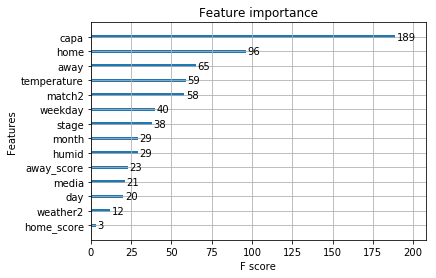

In [64]:
xgb.plot_importance(model)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor()
rf.fit(train_train, train_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
pred = rf.predict(train_test)

In [33]:
np.sqrt(mean_squared_error(train_test_y, pred))

4842.3788998711761

## submit

In [34]:
pred = model.predict(test)

In [35]:
submissions = pd.DataFrame({
    "id": test_id,
    "prediction": pred})
submissions.to_csv("~/repo/study/JLeague/submit/submit_1112_3_xgboost.csv", index=False, header=False)